## XGBoost

In [27]:
#using KGBoost classifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_train_pred_xgb = xgb.predict(x_train)
y_pred_xgb=xgb.predict(x_test)
acc_train_xgb = accuracy_score(y_train,y_train_pred_xgb)
acc_test_xgb = accuracy_score(y_test,y_pred_xgb)
print(f'Accuracy on train data : {acc_train_xgb}')
print(f'Accuracy on test data : {acc_test_xgb}')
print('Classification Report for XGBoost')
print(classification_report(y_test,y_pred_xgb))

Accuracy on train data : 1.0
Accuracy on test data : 0.9216867469879518
Classification Report for XGBoost
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.92      0.91      0.92       117
           2       0.92      0.94      0.93       195
           3       0.86      0.90      0.88        81
           4       0.98      0.92      0.95       103

    accuracy                           0.92       498
   macro avg       0.84      0.84      0.84       498
weighted avg       0.92      0.92      0.92       498



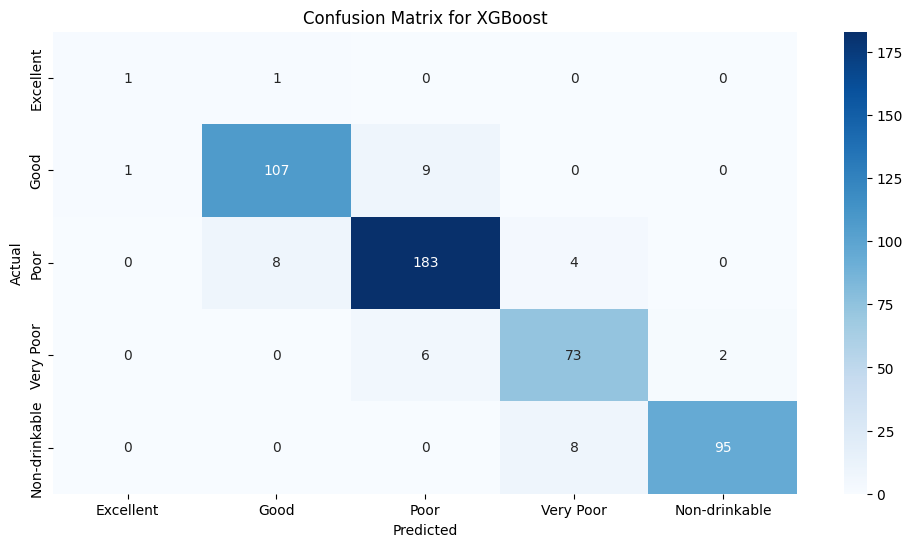

In [28]:
# Confusion metrix of test data
cm = confusion_matrix(y_test,y_pred_xgb)
labels = ['Excellent','Good','Poor','Very Poor','Non-drinkable']
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()

## XGBoost Hyperparameter Tuning

In [29]:
# Define the hyperparameters to tune
xgb_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)],
    'subsample': [x for x in np.linspace(0.2, 1, num = 9)],
    'colsample_bytree' : [x for x in np.linspace(0.2, 1, num = 9)],
    'max_depth': [int(x) for x in np.linspace(2, 10, num = 5)]
}

# Perform Grid Search with cross-validation
grid_search = RandomizedSearchCV(xgb, xgb_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and model
xgb_params = grid_search.best_params_
xgb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_train_pred_xgbtune = xgb_model.predict(x_train)
y_pred_xgbtune = xgb_model.predict(x_test)
acc_train_xgbtune = accuracy_score(y_train, y_train_pred_xgbtune)
acc_test_xgbtune = accuracy_score(y_test, y_pred_xgbtune)

print("Best Parameters using Randomized search:", xgb_params)
print(f'Best Score using Randomized search : {grid_search.best_score_}')
print("Accuracy on train data:", acc_train_xgbtune)
print("Accuracy on test data:", acc_test_xgbtune)
print("Classification Report for Hyperparameter Tuning")
print(classification_report(y_test, y_pred_xgbtune))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters using Randomized search: {'subsample': 0.9000000000000001, 'n_estimators': 200, 'max_depth': 2, 'colsample_bytree': 1.0}
Best Score using Randomized search : 0.9363740432313529
Accuracy on train data: 0.999330207635633
Accuracy on test data: 0.9196787148594378
Classification Report for Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.95      0.92      0.94       117
           2       0.92      0.93      0.93       195
           3       0.82      0.89      0.85        81
           4       0.98      0.92      0.95       103

    accuracy                           0.92       498
   macro avg       0.83      0.83      0.83       498
weighted avg       0.92      0.92      0.92       498



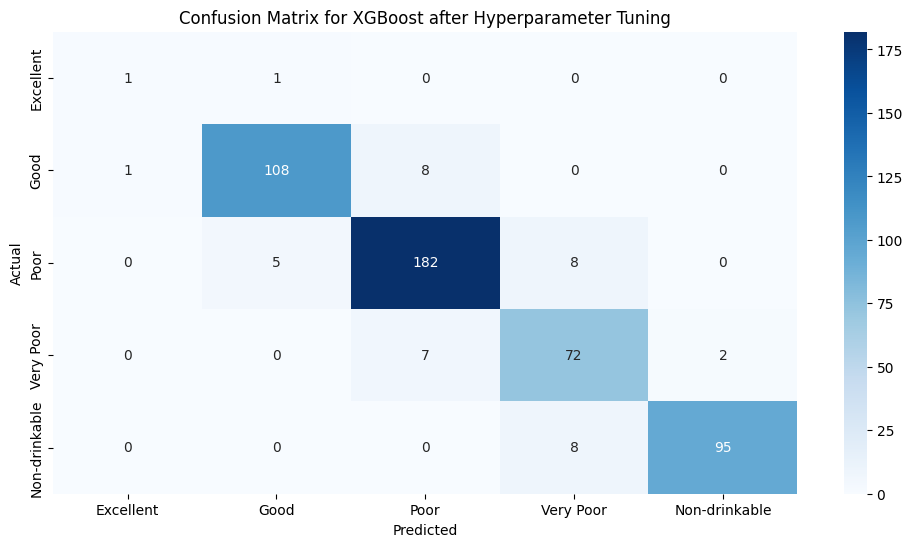

In [30]:
# Confusion metrix of test data
cm = confusion_matrix(y_test,y_pred_xgbtune)
labels = ['Excellent','Good','Poor','Very Poor','Non-drinkable']
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost after Hyperparameter Tuning')
plt.show()

## Comparision

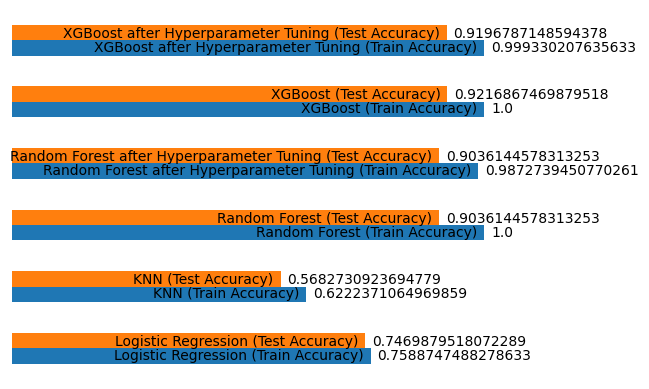

In [56]:
# Creating the DataFrame with model names and accuracy values
bars = pd.DataFrame({'Models': ['Logistic Regression', 'KNN', 'Random Forest', 'Random Forest after Hyperparameter Tuning','XGBoost', 'XGBoost after Hyperparameter Tuning'],
                     'Train Accuracy': [acc_train_lr, acc_train_knn, acc_train_rf, acc_train_rftune, acc_train_xgb, acc_train_xgbtune],
                     'Test Accuracy' : [acc_test_lr, acc_test_knn, acc_test_rf, acc_test_rftune, acc_test_xgb, acc_test_xgbtune]})

# Plotting the horizontal bar graph
ax = bars.plot.barh(y=['Train Accuracy','Test Accuracy'], legend=False)

# Annotating the accuracy values and model names on the right side of each bar
for index, row in bars.iterrows():
    plt.annotate(f"{row['Train Accuracy']}", xy=(row['Train Accuracy'], index),
                 xytext=(5, -5), textcoords='offset points', ha='left', va='center')
    plt.annotate(f"{row['Test Accuracy']}", xy=(row['Test Accuracy'], index),
                 xytext=(5, 5), textcoords='offset points', ha='left', va='center')
    plt.annotate(f"{row['Models']+ ' (Train Accuracy)'}", xy=(row['Train Accuracy'], index),
                 xytext=(-5, -5), textcoords='offset points', ha='right', va='center')
    plt.annotate(f"{row['Models']+ ' (Test Accuracy)'}", xy=(row['Test Accuracy'], index),
                 xytext=(-5, 5), textcoords='offset points', ha='right', va='center')

# Removing the boundary and labels
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks([])  # Remove x-axis labels
plt.yticks([])  # Remove y-axis labels

# Displaying the graph
plt.show()